In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel, HierarchialLinearModel, NonLinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, opponent_feature_names, visualize=False, num_players=580)
train_loader, test_loader, _ = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fcbf7097190>,
 <torch.utils.data.dataloader.DataLoader at 0x7fcbf70976d0>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)


player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)
heirarchial_linear_model = HierarchialLinearModel(player_feature_names, opponent_feature_names)
non_linear_model = NonLinearModel(player_feature_names, opponent_feature_names)


player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
heirarchial_linear_model.fit(train_loader)
non_linear_model.fit(train_loader)

None
None
None
None


In [4]:
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))
print(heirarchial_linear_model.eval(test_loader))
print(non_linear_model.eval(test_loader))

0.8978943255475712
SpearmanrResult(correlation=0.585008356393624, pvalue=0.0)
0.7737252515633256
SpearmanrResult(correlation=0.5997404008812297, pvalue=0.0)
0.5813134852488204
SpearmanrResult(correlation=0.6210581035392538, pvalue=0.0)
0.580351397129231
SpearmanrResult(correlation=0.6102372575267069, pvalue=0.0)
0.570469772679203
SpearmanrResult(correlation=0.6155501481135852, pvalue=0.0)
0.5752268477401555
SpearmanrResult(correlation=0.6261668215710038, pvalue=0.0)


torch.Size([3899, 5, 4])


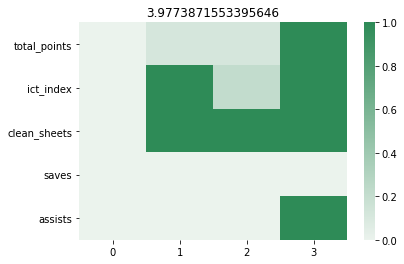

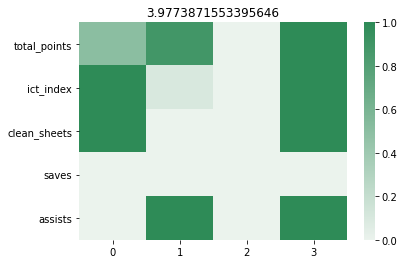

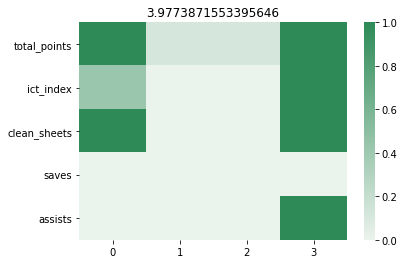

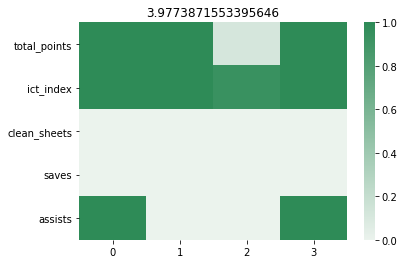

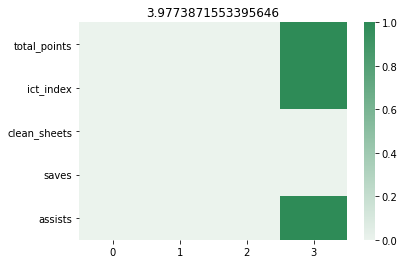

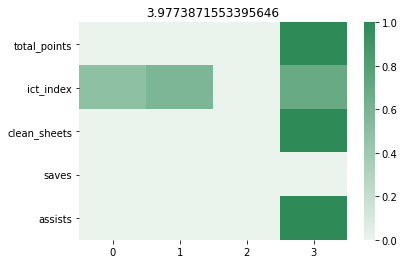

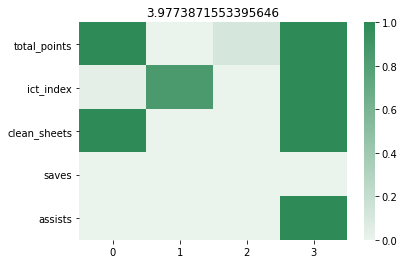

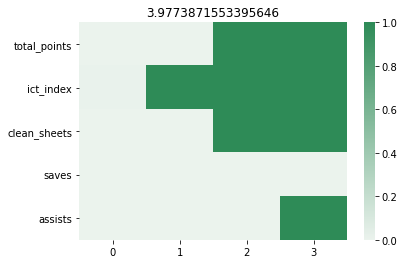

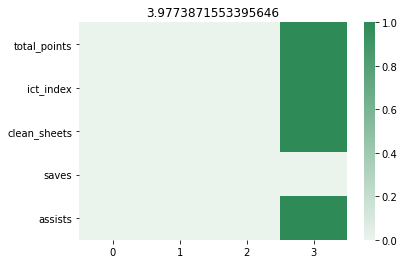

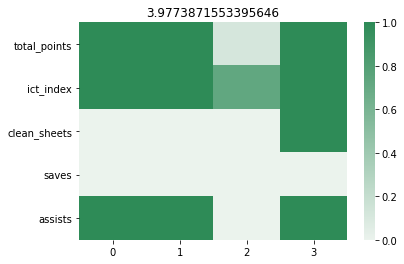

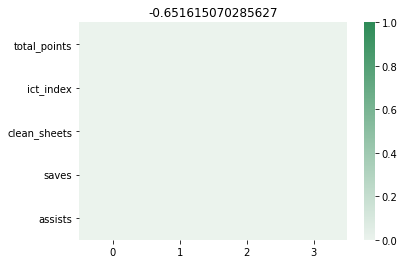

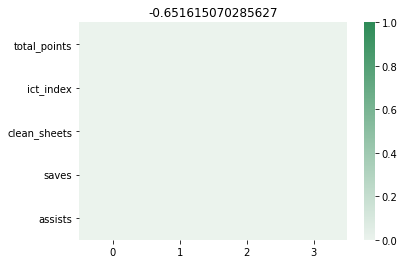

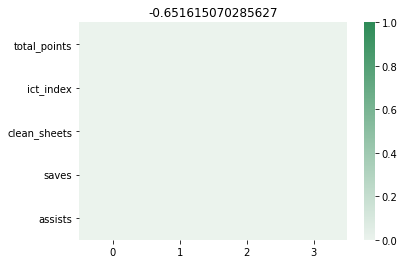

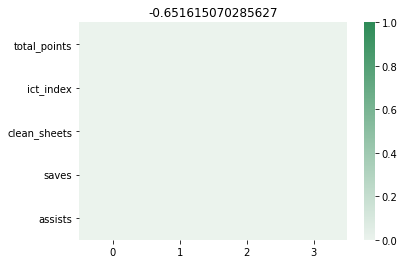

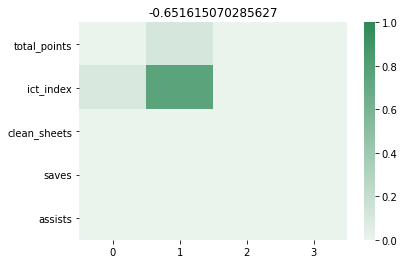

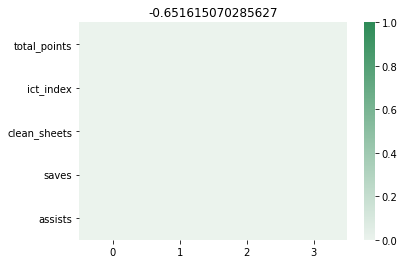

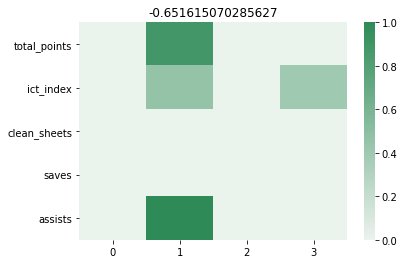

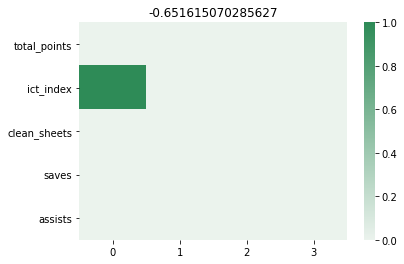

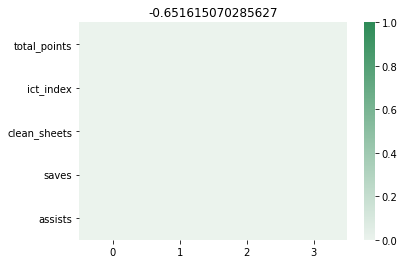

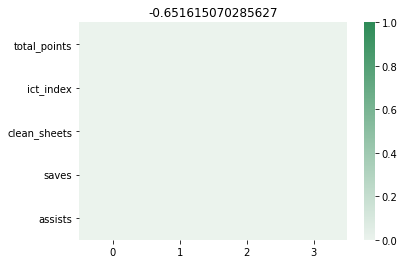

In [5]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3899, 5, 4])


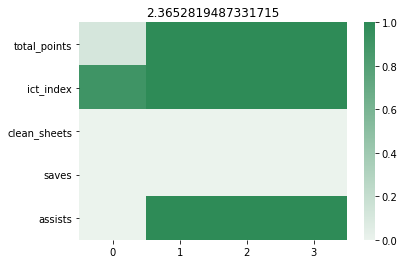

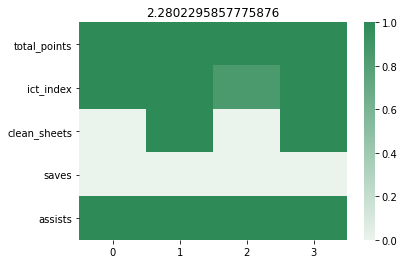

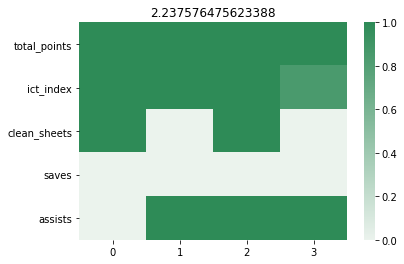

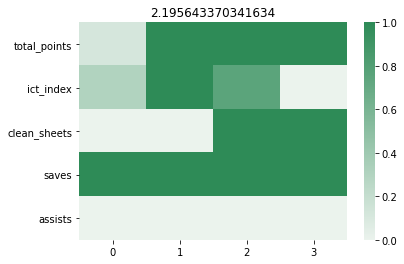

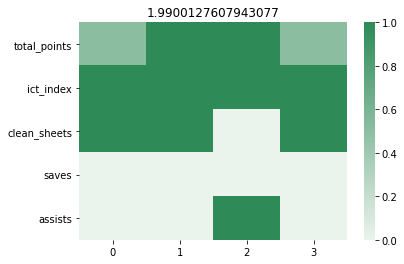

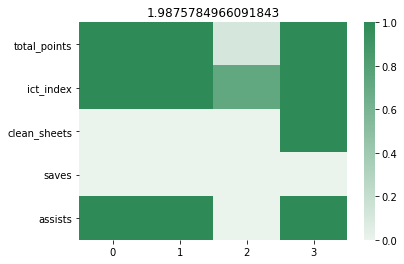

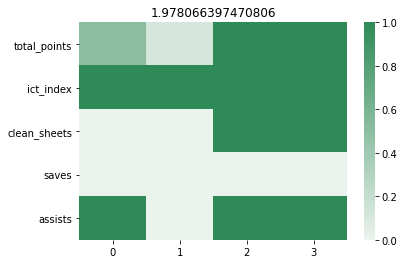

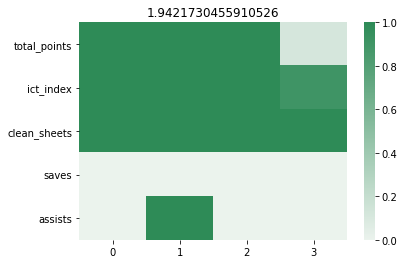

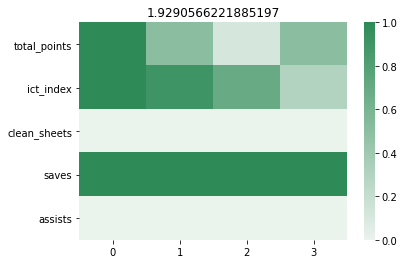

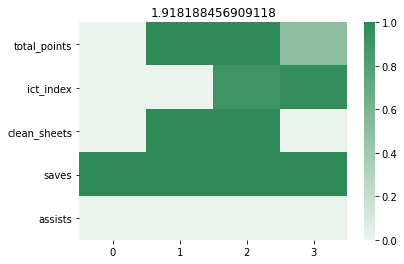

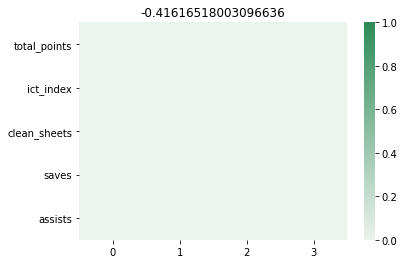

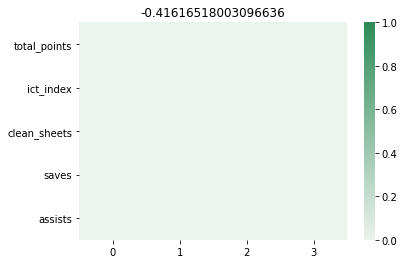

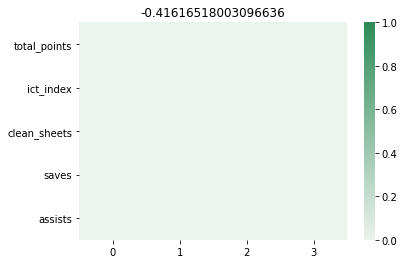

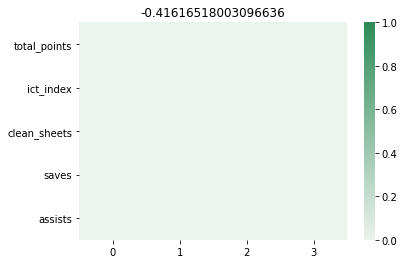

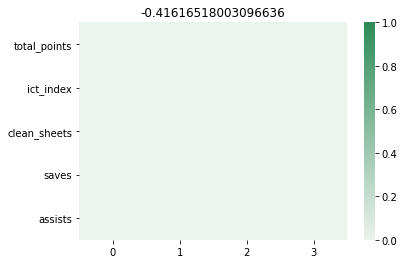

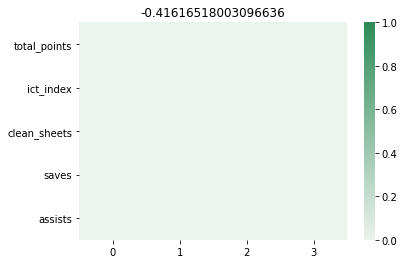

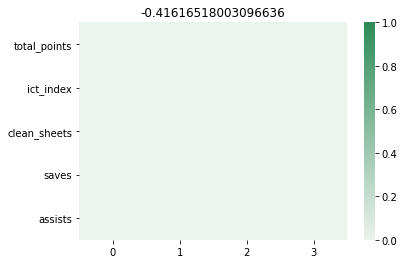

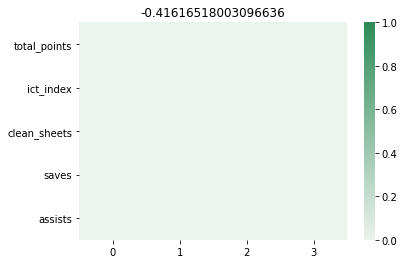

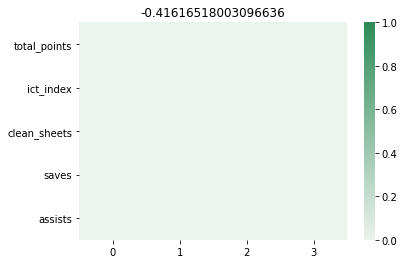

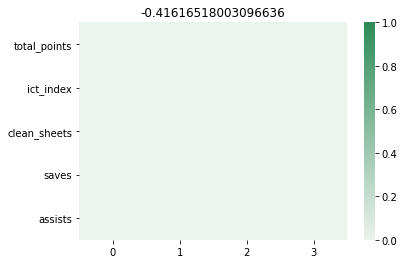

In [6]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3899, 5, 4])


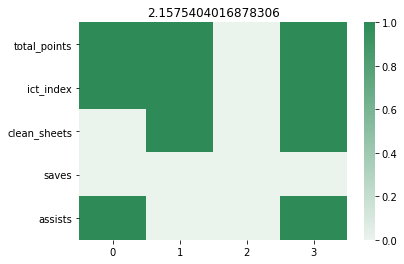

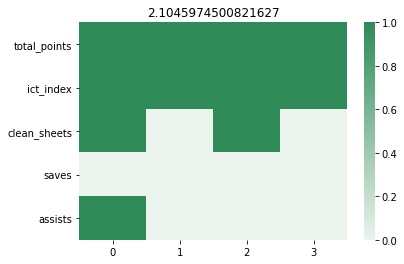

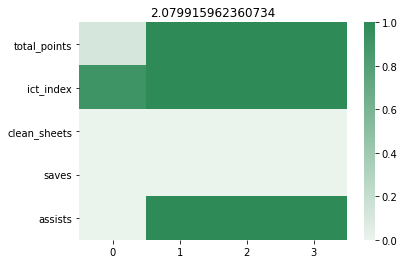

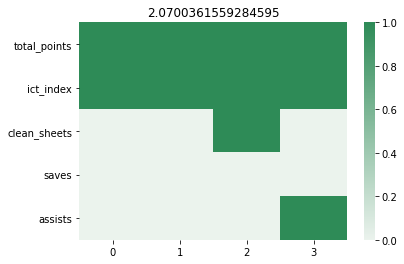

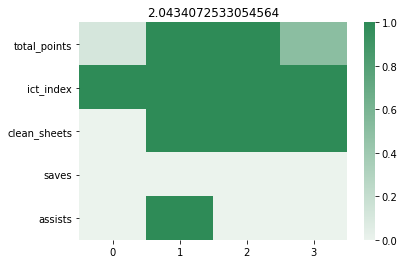

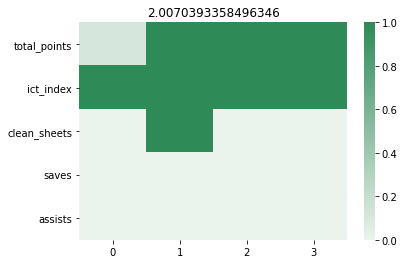

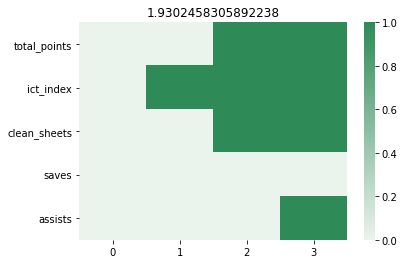

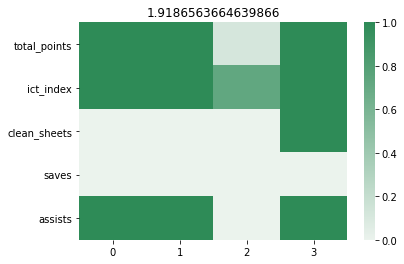

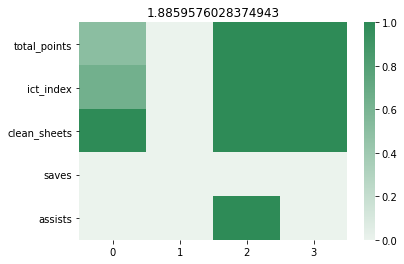

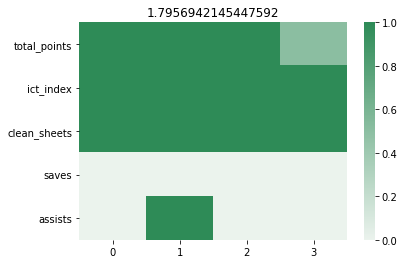

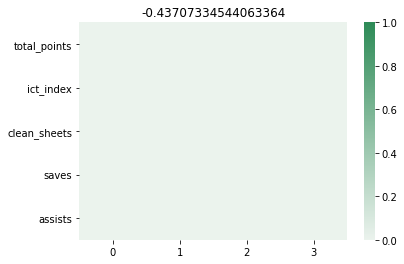

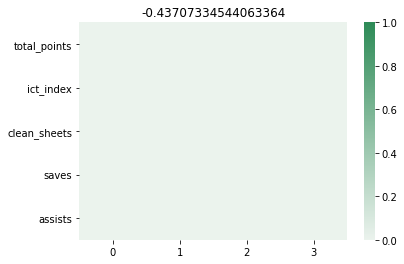

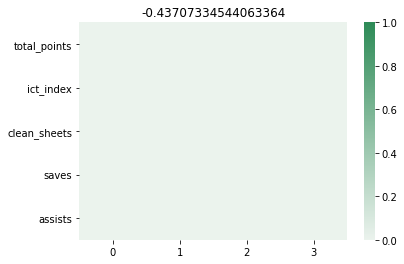

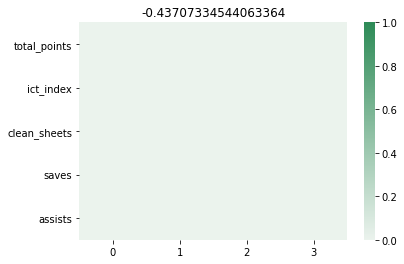

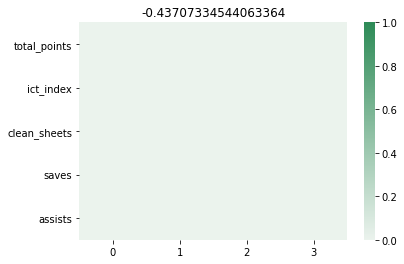

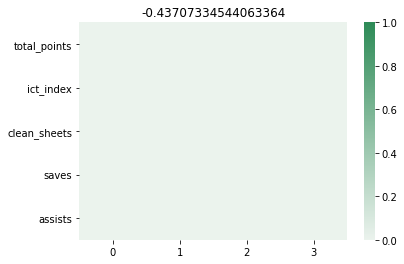

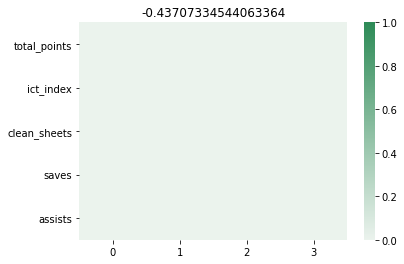

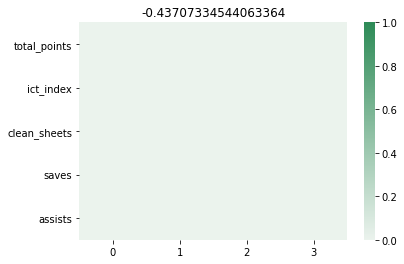

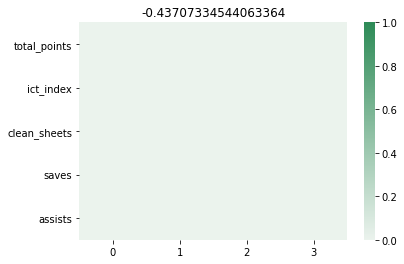

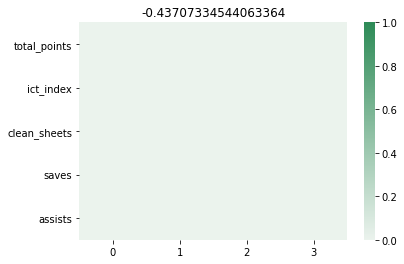

In [7]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3899, 20])


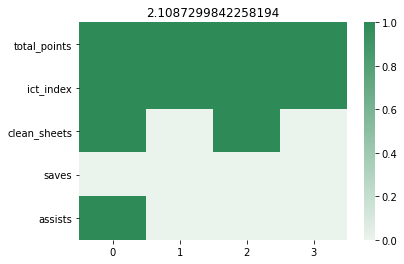

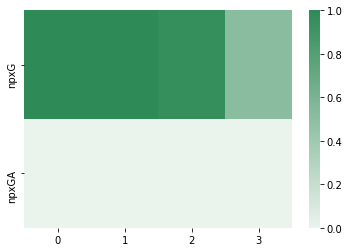

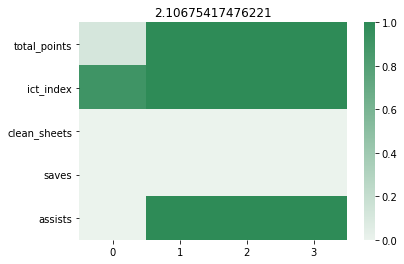

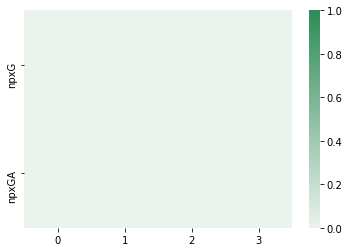

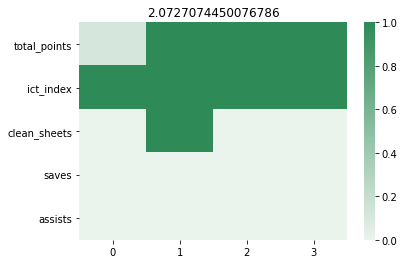

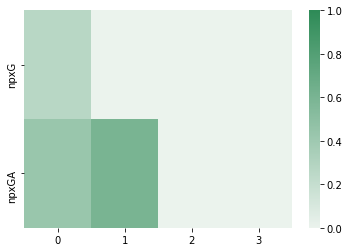

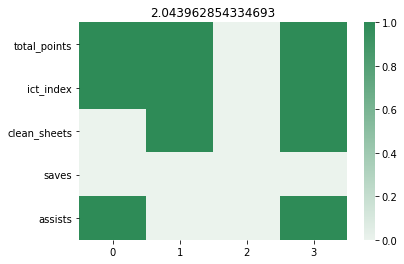

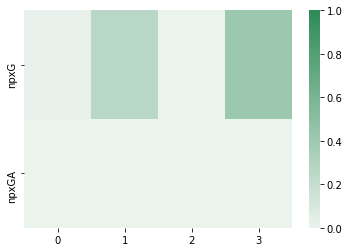

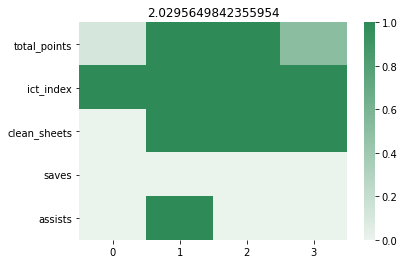

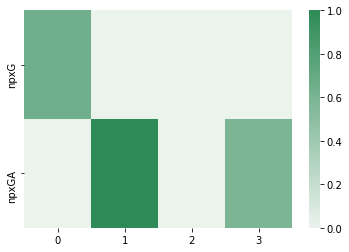

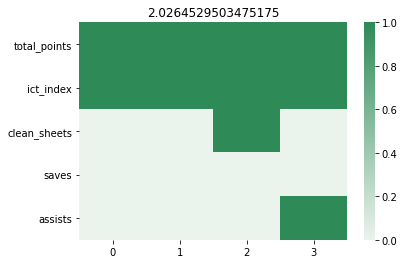

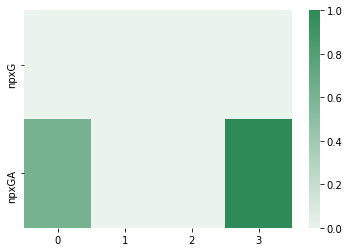

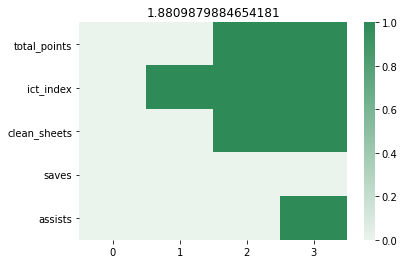

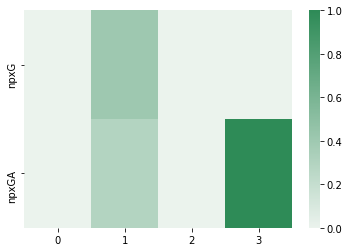

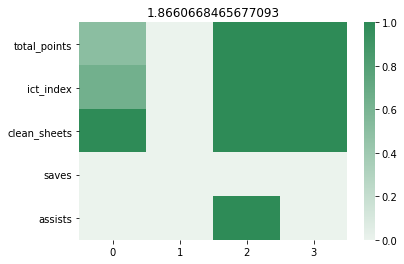

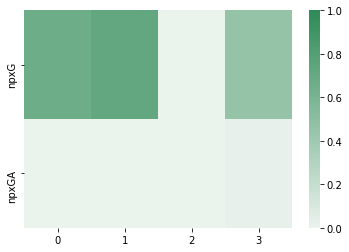

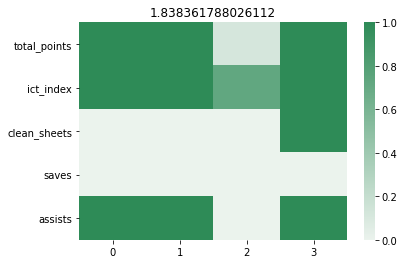

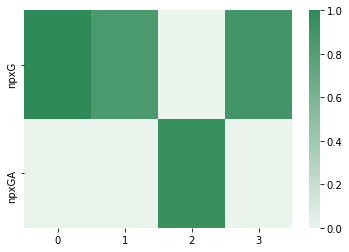

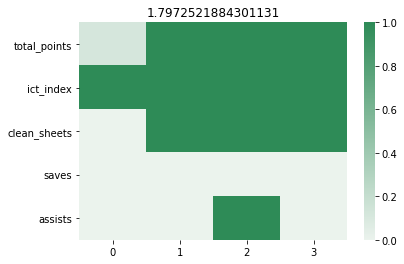

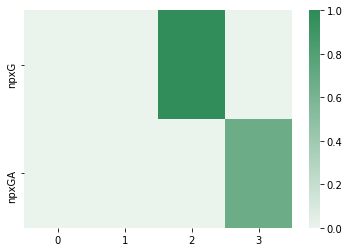

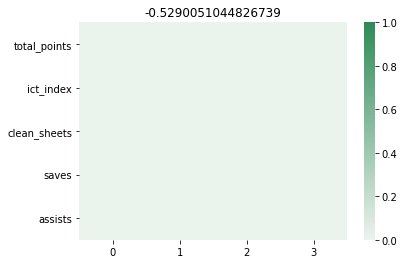

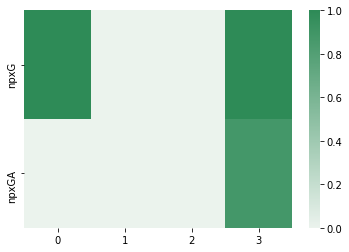

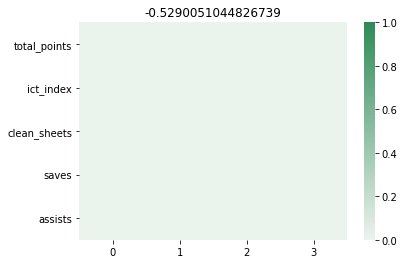

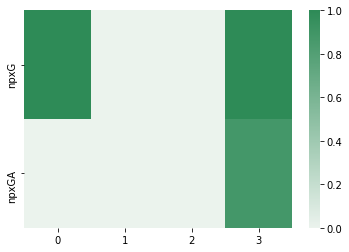

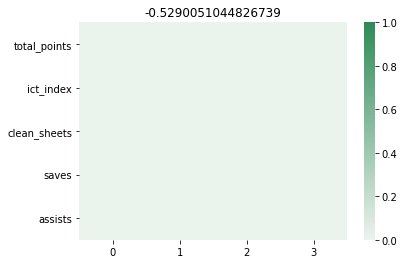

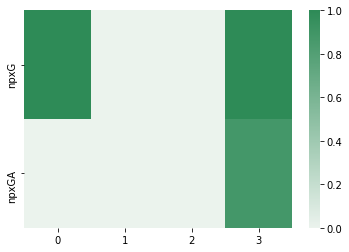

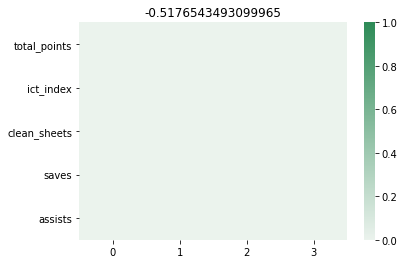

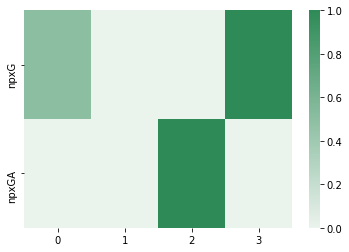

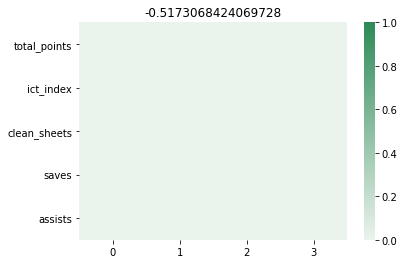

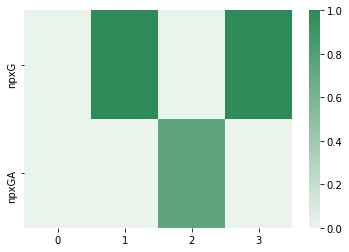

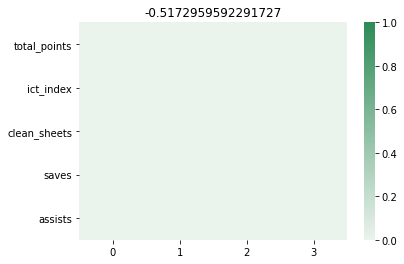

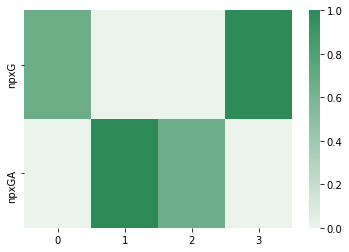

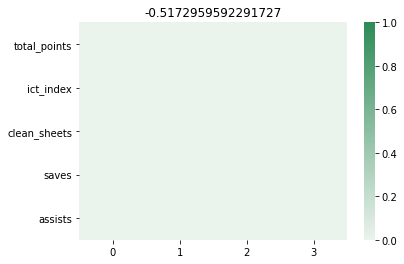

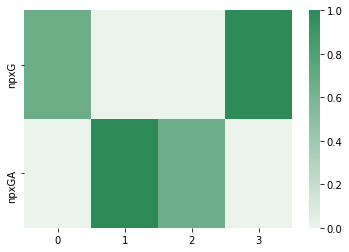

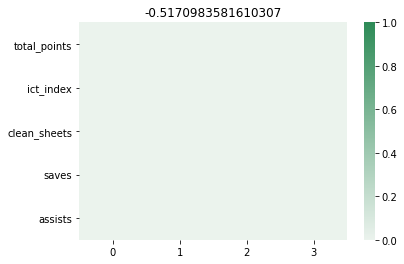

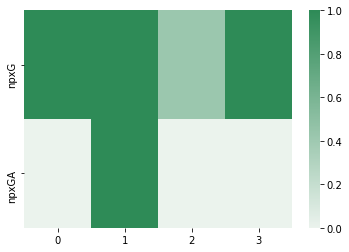

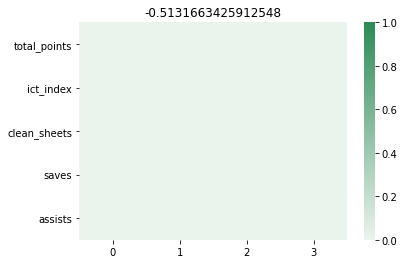

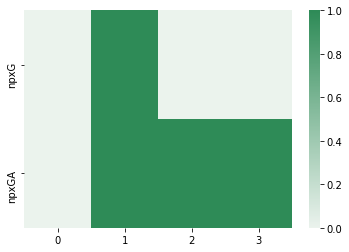

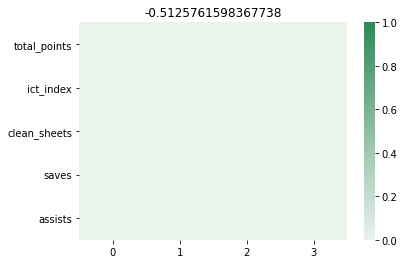

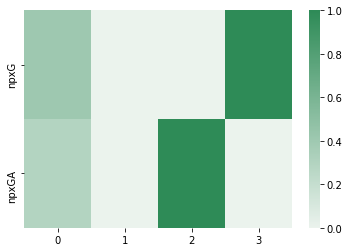

In [8]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

torch.Size([3899, 20])


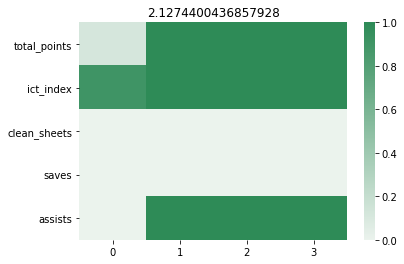

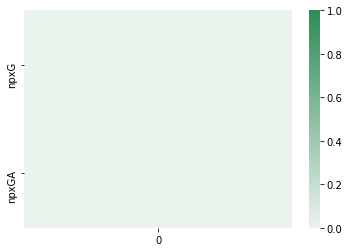

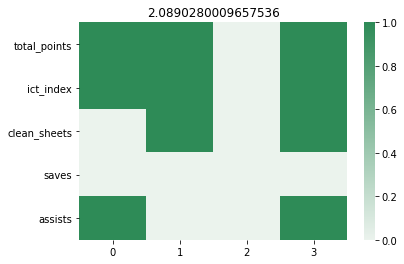

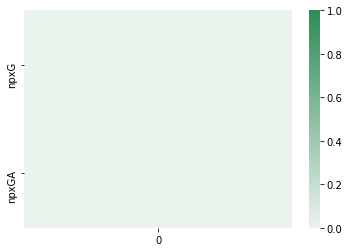

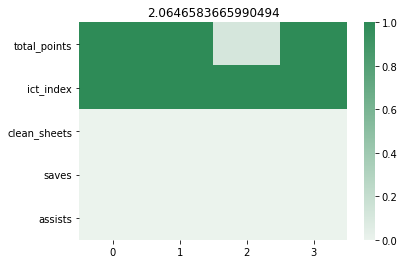

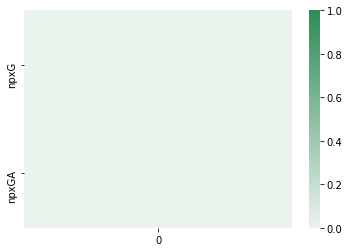

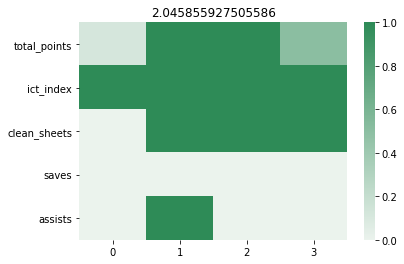

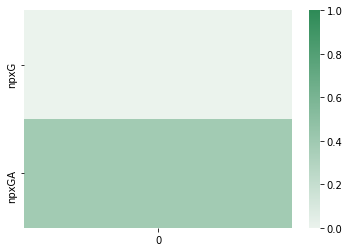

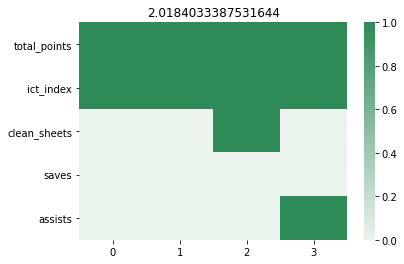

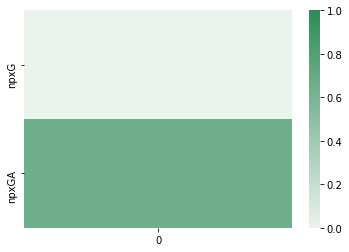

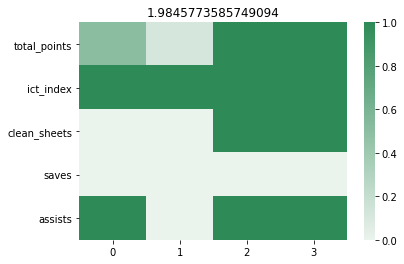

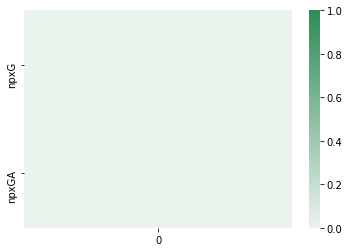

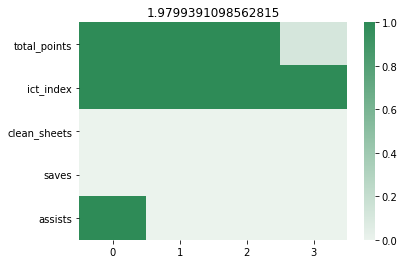

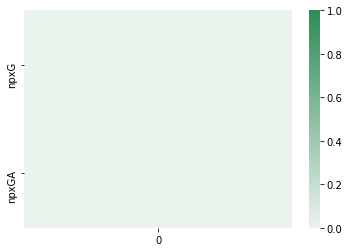

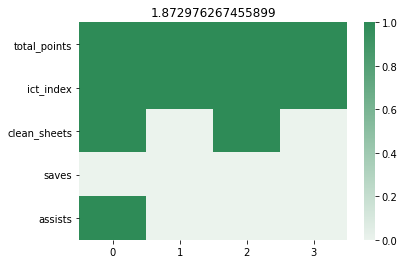

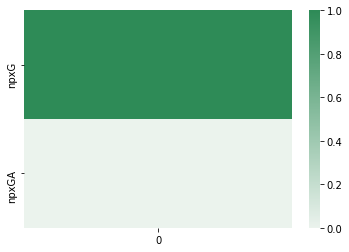

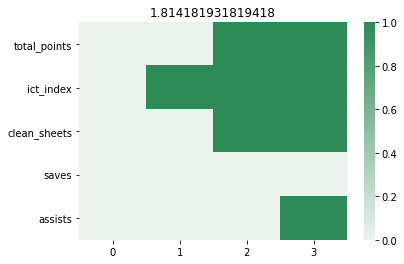

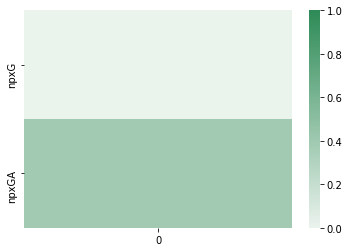

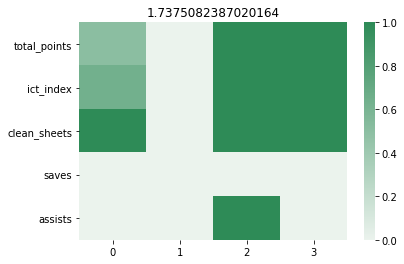

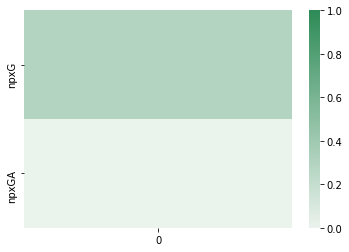

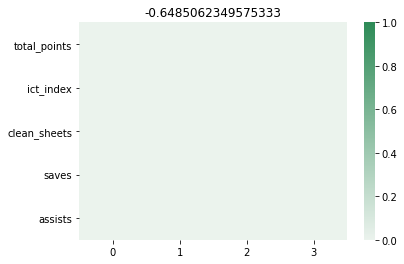

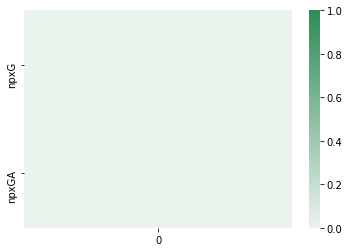

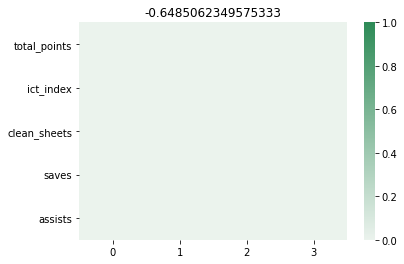

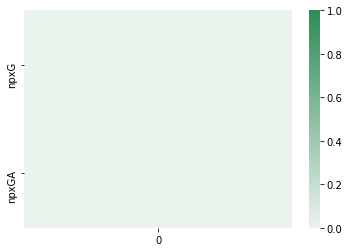

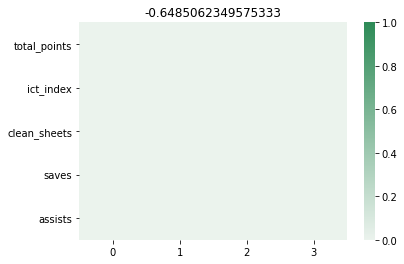

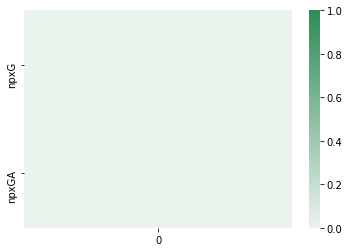

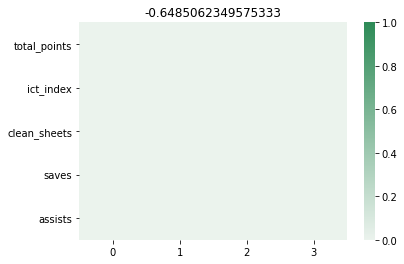

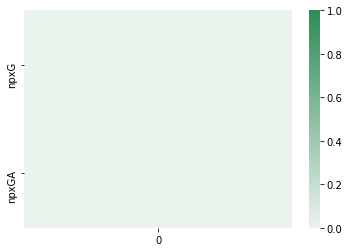

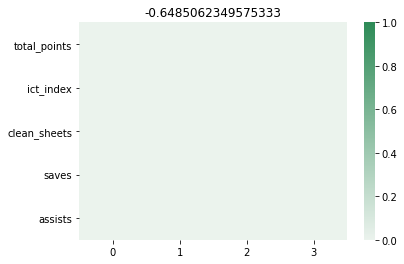

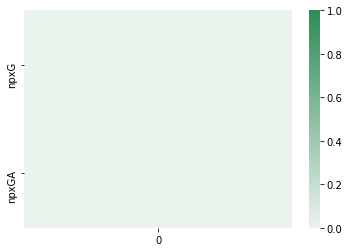

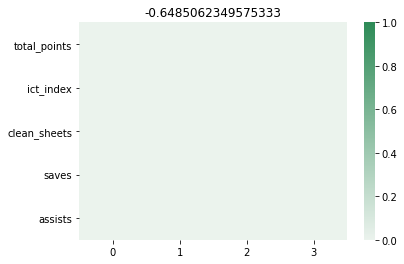

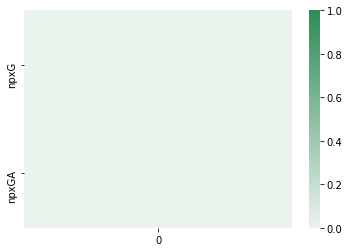

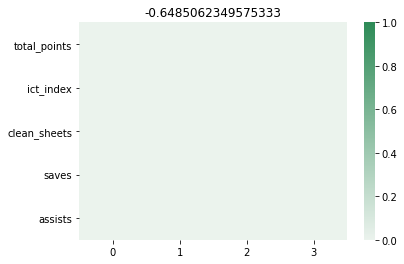

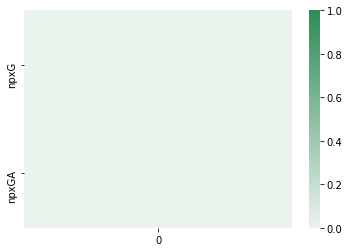

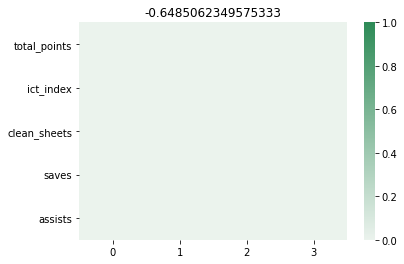

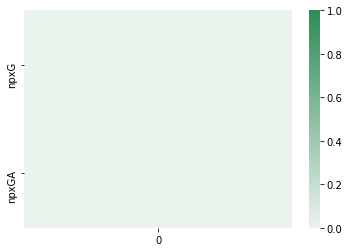

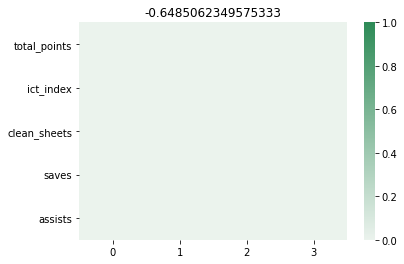

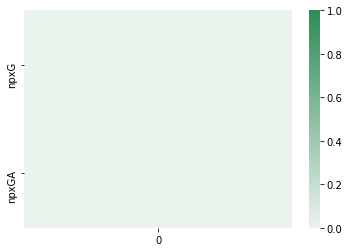

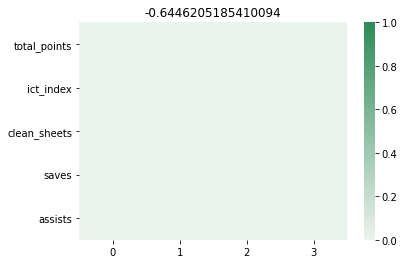

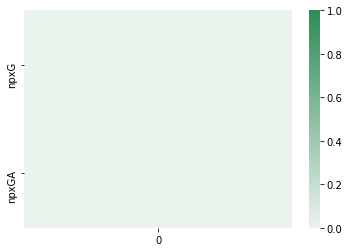

In [9]:
heirarchial_linear_model.visualize_predictions(test_loader)

In [10]:
list(heirarchial_linear_model.model.parameters())

[Parameter containing:
 tensor([[0.3001, 0.0338, 0.0566, 0.1741]], dtype=torch.float64,
        requires_grad=True),
 Parameter containing:
 tensor([-0.1280], dtype=torch.float64, requires_grad=True)]

torch.Size([3899, 20])


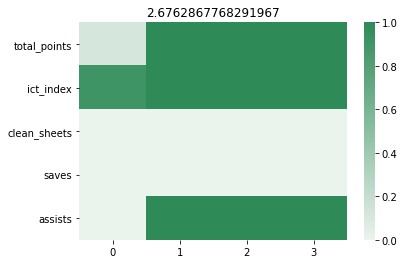

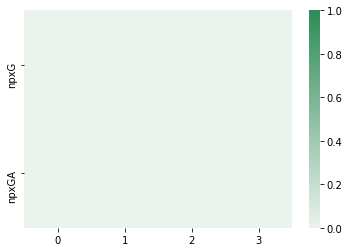

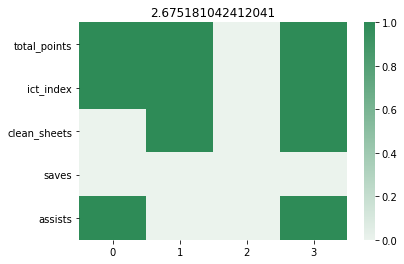

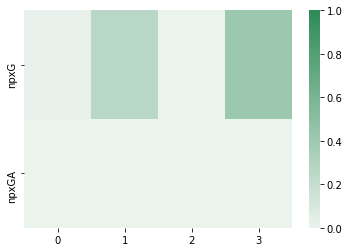

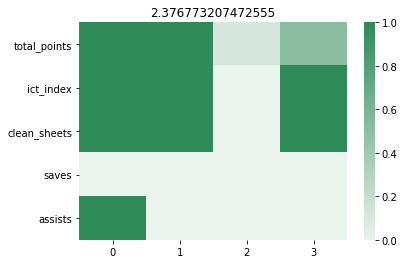

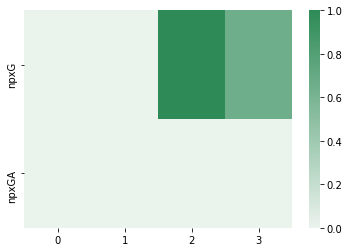

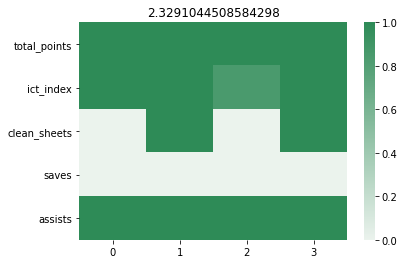

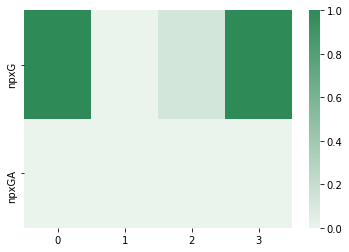

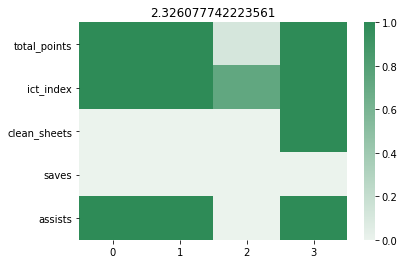

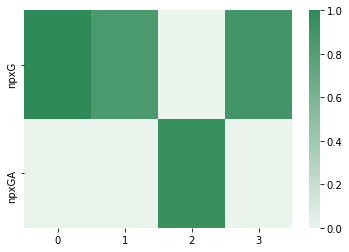

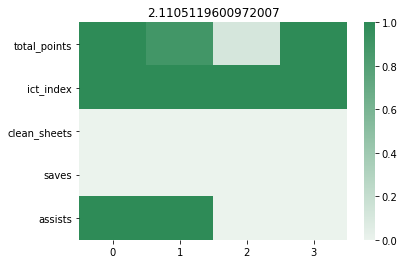

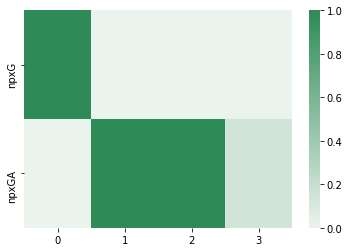

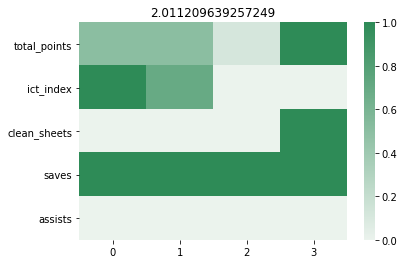

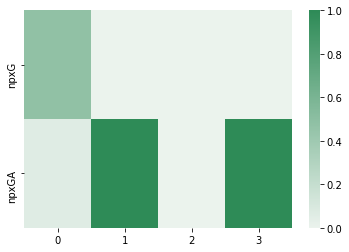

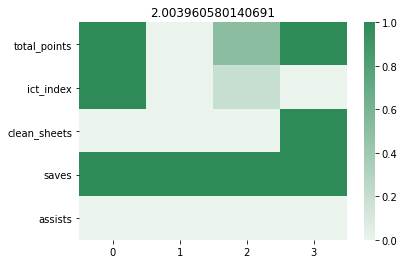

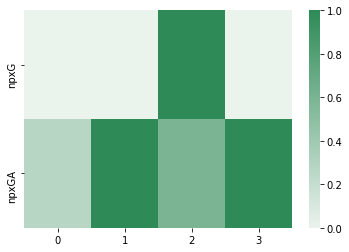

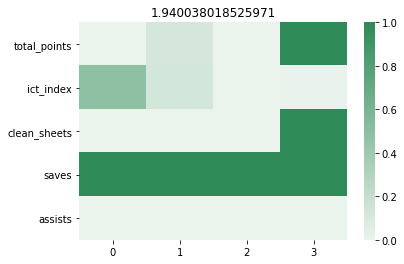

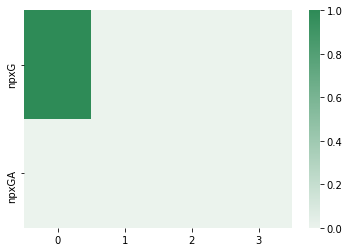

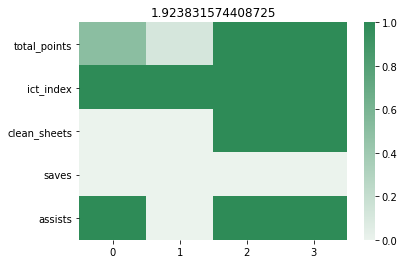

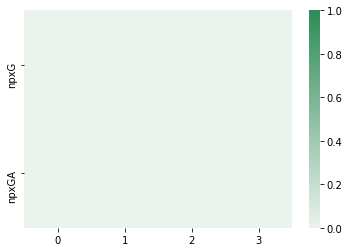

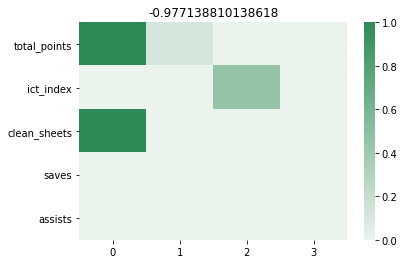

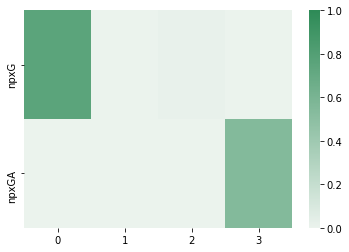

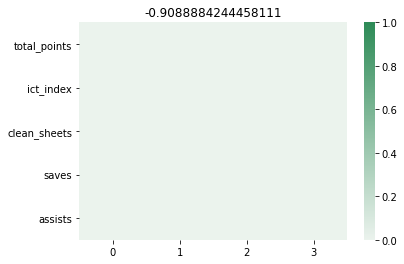

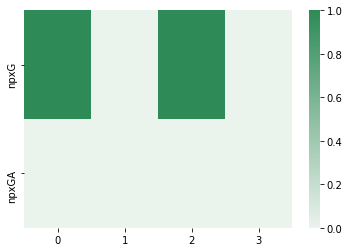

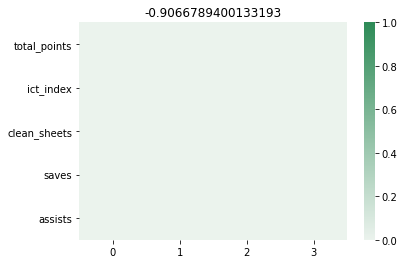

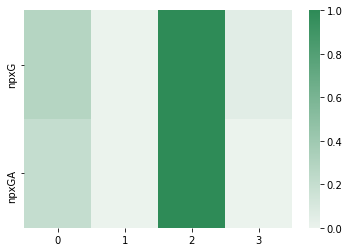

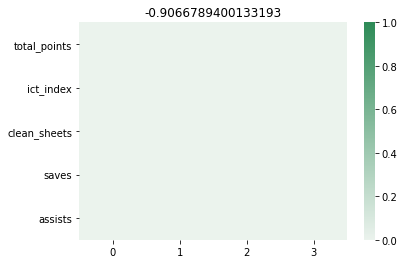

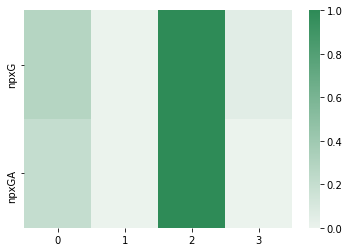

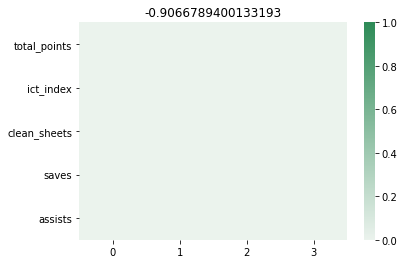

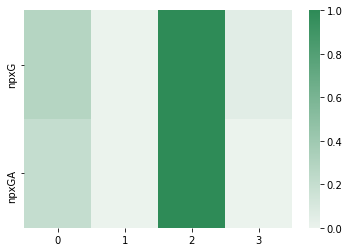

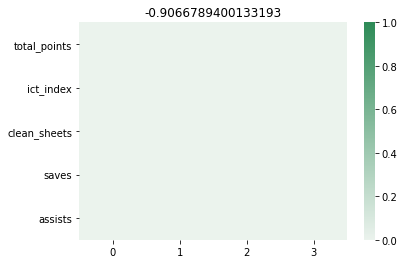

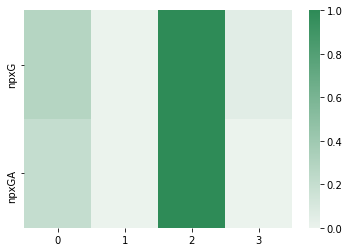

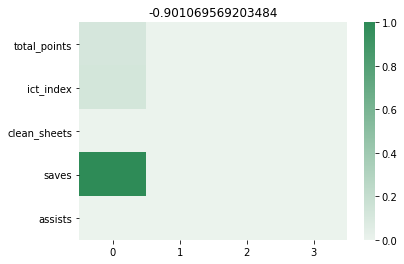

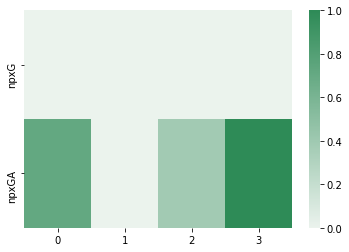

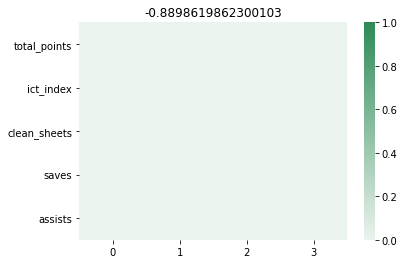

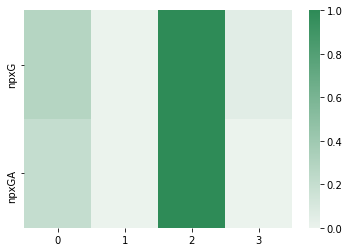

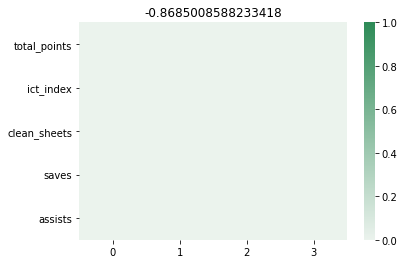

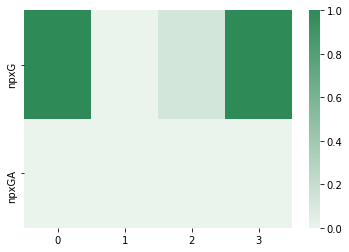

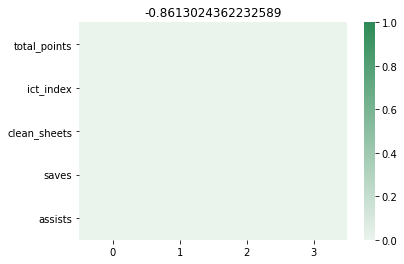

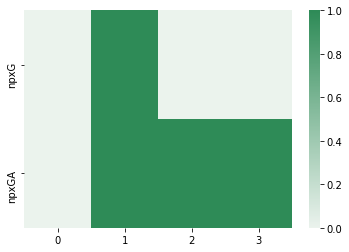

In [11]:
non_linear_model.visualize_predictions(test_loader)